---
title: "Data Exploration"
format: html
---

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_csv('./data/RecordData.csv')
df.head()

,Year,DP02_0001E,DP02_0002E,DP02_0003E,DP02_0007E,DP02_0011E,DP02_0037E,DP02_0060E,DP02_0061E,DP02_0062E,...,DP05_0001E,DP05_0004E,DP05_0018E,DP05_0037E,DP05_0038E,DP05_0039E,DP05_0044E,DP05_0073E,RegionName,Typical Home Value
0,2018,0.007341,0.009226,-0.008186,0.090413,0.007228,0.004783,0.022710,-0.002918,0.018174,...,0.002692,0.003198,0.010283,-0.001775,-0.000327,-0.123824,-0.027097,0.217687,Alabama,0.038688
1,2019,0.022851,-0.265678,-0.360479,-0.317095,-0.802204,1.302990,-0.588360,-0.705200,0.439418,...,0.003133,-0.006376,0.002545,0.005908,0.009572,0.054480,0.015884,-0.178100,Alabama,0.070360
2,2021,0.036880,0.013836,0.056032,-0.010988,0.081890,-0.050374,-0.025077,-0.044056,0.038532,...,0.027878,0.008556,0.010152,-0.013376,-0.010947,0.067268,0.040587,-0.005625,Alabama,0.263465
3,2022,0.024848,0.041137,0.053954,-0.058821,0.009307,0.106362,-0.070979,-0.062720,-0.020504,...,0.006829,-0.001060,-0.005025,0.006291,-0.002353,-0.017318,0.146484,10.243876,Alabama,0.076587
4,2018,0.015195,0.000753,-0.043082,-0.078405,0.043289,0.942898,-0.208181,0.031255,0.017837,...,-0.003186,-0.009174,0.011594,-0.000634,0.139775,0.012942,-0.060828,0.054155,Alaska,0.005789


In [3]:
df.describe()

,Year,DP02_0001E,DP02_0002E,DP02_0003E,DP02_0007E,DP02_0011E,DP02_0037E,DP02_0060E,DP02_0061E,DP02_0062E,...,DP04_0134E,DP05_0001E,DP05_0004E,DP05_0018E,DP05_0037E,DP05_0038E,DP05_0039E,DP05_0044E,DP05_0073E,Typical Home Value
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,...,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,2020.000000,0.020044,-0.050633,-0.069625,-0.089833,-0.206925,0.524127,-0.109497,-0.220982,0.093385,...,0.056447,0.006469,0.002941,0.005769,-0.021826,0.001579,0.059462,0.019590,4.530851,0.110084
std,1.585028,0.017131,0.120031,0.157685,0.232427,0.365501,0.945060,0.198461,0.329615,0.215643,...,0.033730,0.010885,0.007600,0.005859,0.059540,0.112276,0.268675,0.078313,11.884183,0.099373
min,2018.000000,-0.009240,-0.355454,-0.490505,-0.554143,-0.888434,-0.346730,-0.656774,-0.870279,-0.112117,...,-0.019983,-0.050583,-0.020735,-0.010390,-0.383837,-0.387319,-0.578552,-0.274559,-0.451586,-0.016960
25%,2018.750000,0.009339,-0.065194,-0.128874,-0.290981,-0.361259,-0.017399,-0.161193,-0.355393,-0.013111,...,0.031688,-0.000028,-0.001061,0.002532,-0.017285,-0.032278,-0.078743,-0.013964,-0.009074,0.049067
50%,2020.000000,0.016837,0.004610,-0.002334,-0.026105,-0.022791,0.063992,-0.047421,-0.056749,0.005985,...,0.052233,0.004786,0.002001,0.005263,-0.001994,0.004109,0.025383,0.017288,0.078421,0.066658
75%,2021.250000,0.025940,0.021921,0.030698,0.047844,0.020779,0.951449,0.011528,-0.004048,0.052998,...,0.078260,0.012023,0.007316,0.008433,0.004153,0.026074,0.104096,0.049673,1.078422,0.135000
max,2022.000000,0.096015,0.083260,0.210279,0.571831,0.310981,4.711793,0.583672,0.233134,1.166320,...,0.176136,0.063712,0.024341,0.026667,0.042915,0.940551,1.598558,0.394246,85.273260,0.576048


As you can see there may be some problematic columns that we may not want to use in our analysis. For now lest drop the DP05_0073E as the standard deviation is very high which may indicate incorrectly measured data.

In [5]:
df=df.drop('DP05_0073E',axis=1)


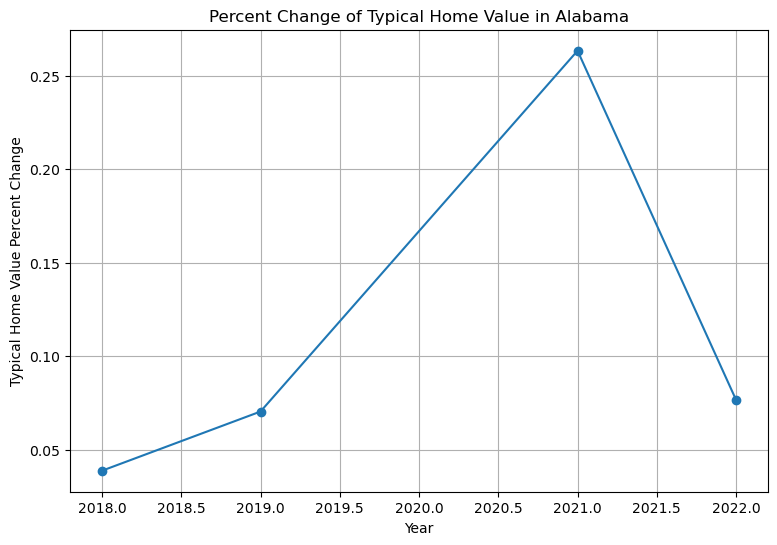

In [20]:
Alabama_data = df[df['RegionName'] == 'Alabama']

plt.figure(figsize=(9, 6))
plt.plot(Alabama_data['Year'], Alabama_data['Typical Home Value'], marker='o', linestyle='-')
plt.title("Percent Change of Typical Home Value in Alabama")
plt.xlabel("Year")
plt.ylabel("Typical Home Value Percent Change")
plt.grid(True)
plt.show()

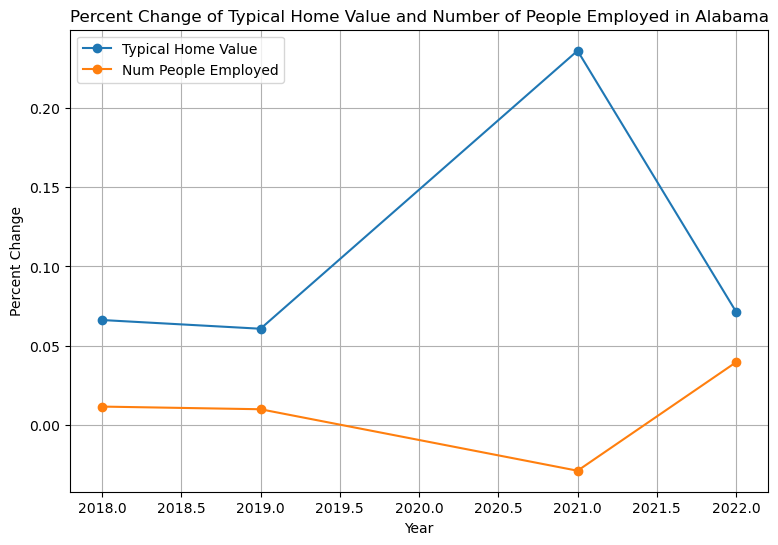

In [26]:
plt.figure(figsize=(9, 6))
plt.plot(Alabama_data['Year'], Alabama_data['Typical Home Value'], label='Typical Home Value', marker='o', linestyle='-')
plt.plot(Alabama_data['Year'], Alabama_data['DP03_0026PE'], label='Num People Employed', marker='o', linestyle='-')
plt.title("Percent Change of Typical Home Value and Number of People Employed in Alabama")
plt.xlabel("Year")
plt.ylabel("Percent Change")
plt.grid(True)
plt.legend()
plt.show()

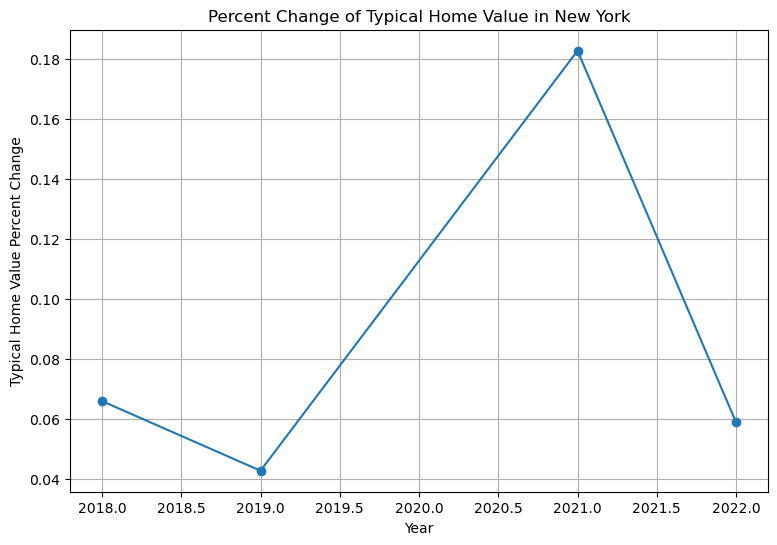

In [25]:
NewYork_data = df[df['RegionName'] == 'New York']

plt.figure(figsize=(9, 6))
plt.plot(NewYork_data['Year'], NewYork_data['Typical Home Value'], marker='o', linestyle='-')
plt.title("Percent Change of Typical Home Value in New York")
plt.xlabel("Year")
plt.ylabel("Typical Home Value Percent Change")
plt.grid(True)
plt.show()

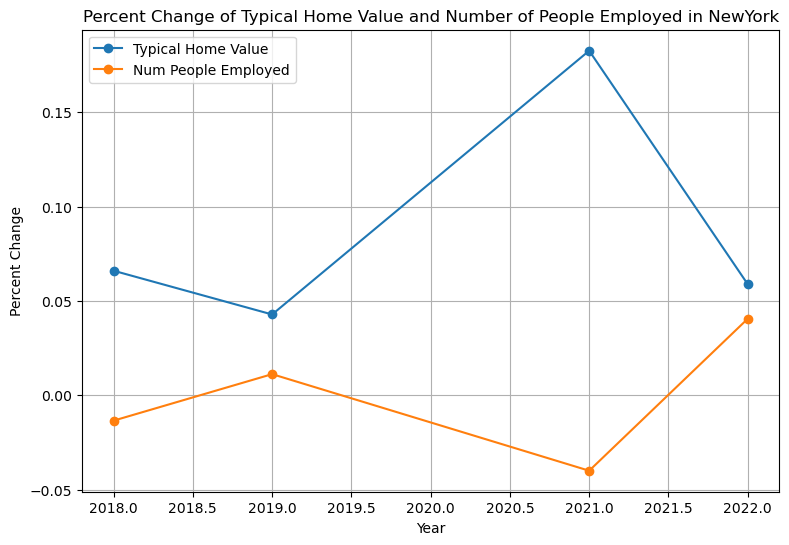

In [27]:
plt.figure(figsize=(9, 6))
plt.plot(NewYork_data['Year'], NewYork_data['Typical Home Value'], label='Typical Home Value', marker='o', linestyle='-')
plt.plot(NewYork_data['Year'], NewYork_data['DP03_0026PE'], label='Num People Employed', marker='o', linestyle='-')
plt.title("Percent Change of Typical Home Value and Number of People Employed in NewYork")
plt.xlabel("Year")
plt.ylabel("Percent Change")
plt.grid(True)
plt.legend()
plt.show()

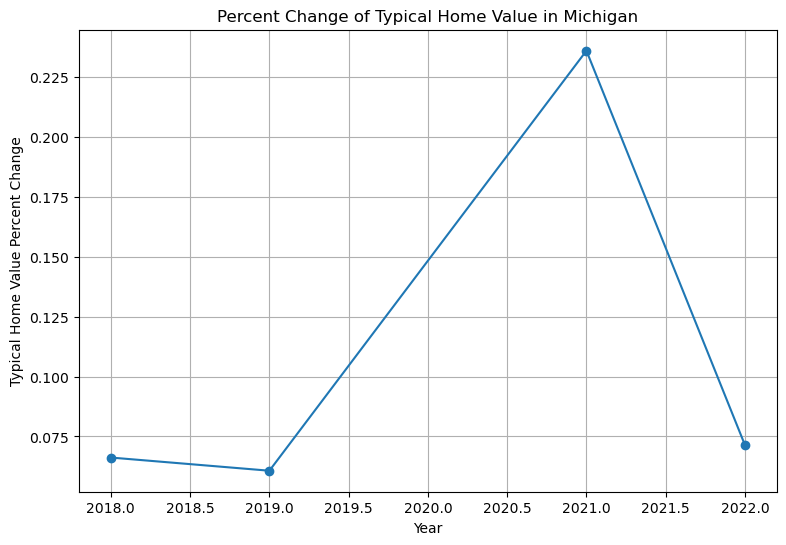

In [28]:
Michigan_data = df[df['RegionName'] == 'Michigan']

plt.figure(figsize=(9, 6))
plt.plot(Michigan_data['Year'], Michigan_data['Typical Home Value'], marker='o', linestyle='-')
plt.title("Percent Change of Typical Home Value in Michigan")
plt.xlabel("Year")
plt.ylabel("Typical Home Value Percent Change")
plt.grid(True)
plt.show()

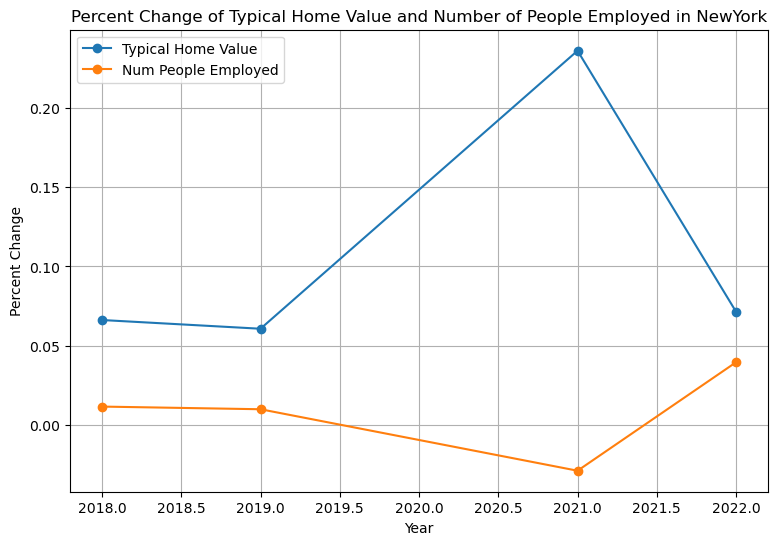

In [29]:
plt.figure(figsize=(9, 6))
plt.plot(Michigan_data['Year'], Michigan_data['Typical Home Value'], label='Typical Home Value', marker='o', linestyle='-')
plt.plot(Michigan_data['Year'], Michigan_data['DP03_0026PE'], label='Num People Employed', marker='o', linestyle='-')
plt.title("Percent Change of Typical Home Value and Number of People Employed in NewYork")
plt.xlabel("Year")
plt.ylabel("Percent Change")
plt.grid(True)
plt.legend()
plt.show()

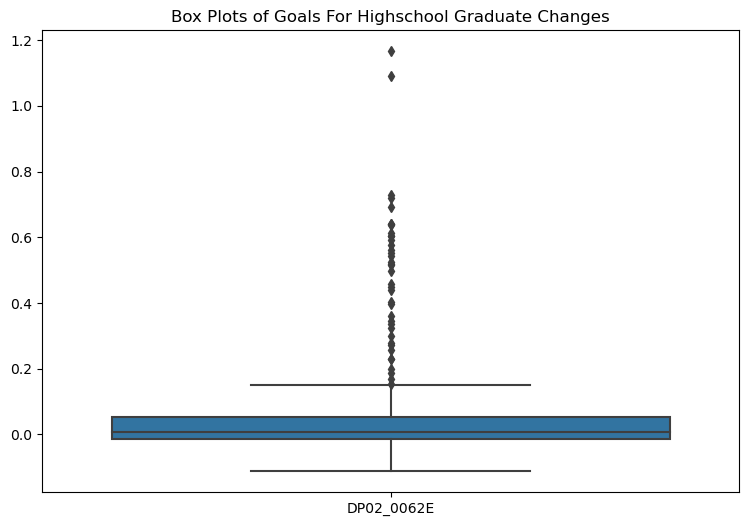

In [31]:
plt.figure(figsize=(9, 6))
sns.boxplot(data=df[['DP02_0062E']])
plt.title('Box Plots of Goals For Highschool Graduate Changes')
plt.show()

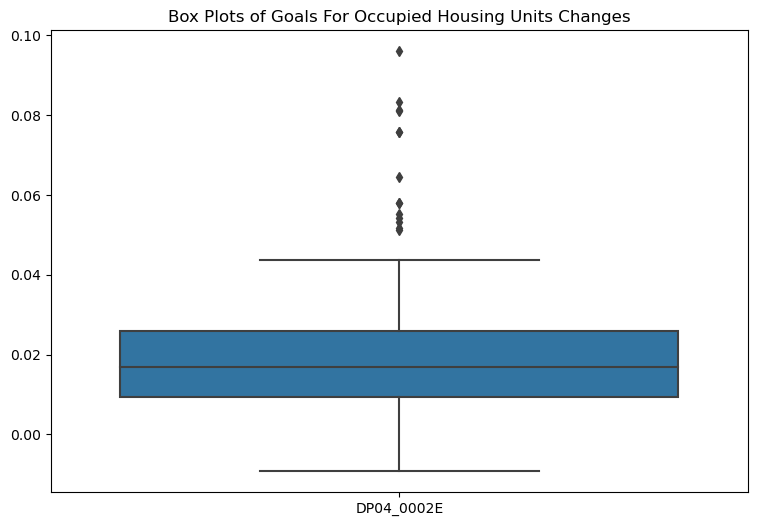

In [34]:
plt.figure(figsize=(9, 6))
sns.boxplot(data=df[['DP04_0002E']])
plt.title('Box Plots of Goals For Occupied Housing Units Changes')
plt.show()

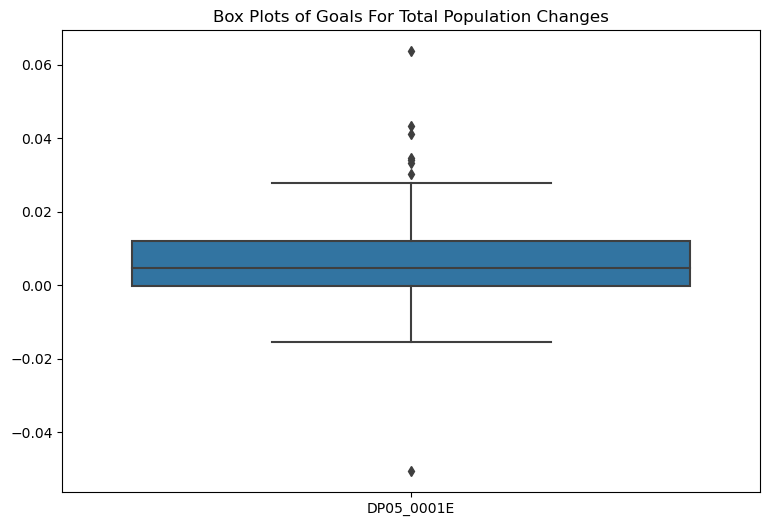

In [35]:
plt.figure(figsize=(9, 6))
sns.boxplot(data=df[['DP05_0001E']])
plt.title('Box Plots of Goals For Total Population Changes')
plt.show()

A lot of Outliers in alot of my variables. I should try to remove them.

In [5]:
df2=df.drop(['Year','RegionName'],axis=1)

In [39]:
df2.corr()

,DP02_0001E,DP02_0002E,DP02_0003E,DP02_0007E,DP02_0011E,DP02_0037E,DP02_0060E,DP02_0061E,DP02_0062E,DP02_0063E,...,DP04_0047E,DP04_0134E,DP05_0001E,DP05_0004E,DP05_0018E,DP05_0037E,DP05_0038E,DP05_0039E,DP05_0044E,Typical Home Value
DP02_0001E,1.000000,0.438800,0.465624,0.248086,0.336708,-0.260457,0.312382,0.287555,-0.294137,-0.318927,...,0.368283,0.421822,0.390172,0.331799,0.277745,-0.536511,-0.153728,0.009718,0.049971,0.578869
DP02_0002E,0.438800,1.000000,0.981878,0.790430,0.945954,-0.831271,0.757746,0.931202,-0.766019,-0.920144,...,0.063216,0.497780,0.276947,0.331144,0.021856,-0.274077,-0.166218,0.019215,0.078385,0.444488
DP02_0003E,0.465624,0.981878,1.000000,0.771685,0.943687,-0.815491,0.781559,0.917415,-0.774410,-0.906359,...,0.090782,0.499087,0.241894,0.325107,0.017160,-0.278718,-0.198401,-0.003718,0.081323,0.447811
DP02_0007E,0.248086,0.790430,0.771685,1.000000,0.797750,-0.742020,0.682252,0.800932,-0.621534,-0.745090,...,0.093202,0.412152,0.194073,0.243893,0.024614,-0.212158,-0.045523,0.056621,0.111638,0.364732
DP02_0011E,0.336708,0.945954,0.943687,0.797750,1.000000,-0.894087,0.803087,0.972320,-0.749640,-0.896076,...,0.093006,0.438733,0.151822,0.228283,0.085614,-0.219316,-0.214236,0.019388,0.115063,0.338099
DP02_0037E,-0.260457,-0.831271,-0.815491,-0.742020,-0.894087,1.000000,-0.711113,-0.893892,0.592598,0.785771,...,-0.040640,-0.411501,-0.118924,-0.275845,-0.072924,0.213962,0.149411,-0.005464,-0.171662,-0.327840
DP02_0060E,0.312382,0.757746,0.781559,0.682252,0.803087,-0.711113,1.000000,0.782436,-0.655789,-0.724942,...,0.135533,0.460252,0.192067,0.237910,0.159691,-0.212471,-0.298075,0.009762,0.029356,0.297504
DP02_0061E,0.287555,0.931202,0.917415,0.800932,0.972320,-0.893892,0.782436,1.000000,-0.752483,-0.875352,...,0.109633,0.424624,0.179373,0.191868,0.090643,-0.152399,-0.195105,0.055358,0.137906,0.290155
DP02_0062E,-0.294137,-0.766019,-0.774410,-0.621534,-0.749640,0.592598,-0.655789,-0.752483,1.000000,0.625286,...,-0.004732,-0.423344,-0.185994,-0.201587,-0.058643,0.172882,0.132303,0.004590,-0.111726,-0.296042
DP02_0063E,-0.318927,-0.920144,-0.906359,-0.745090,-0.896076,0.785771,-0.724942,-0.875352,0.625286,1.000000,...,-0.068992,-0.410235,-0.127849,-0.290762,-0.002780,0.222860,0.165423,-0.042741,-0.026843,-0.339538


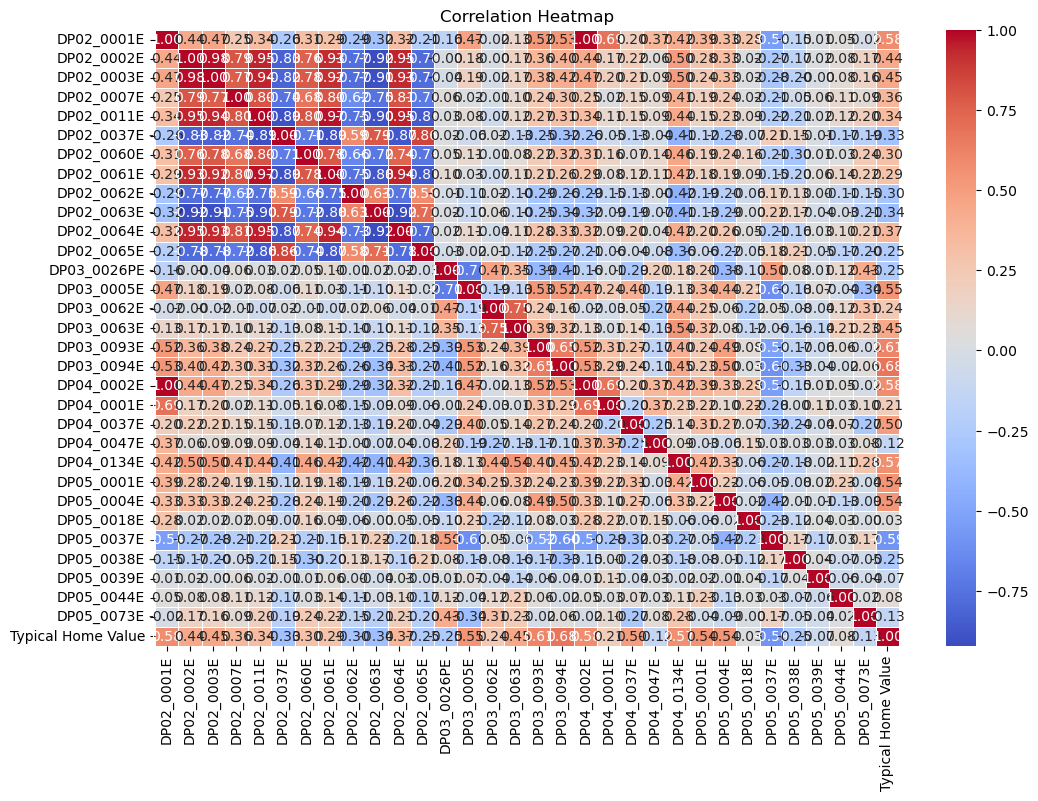

In [6]:
plt.figure(figsize=(12, 8)) 
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

It seems my initial hypotheses were correct in that most of the questions I was asking are relevant to home prices.